In [17]:
import cPickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [35]:
mnist = cPickle.load(open("/large/data/mnist.pkl", "rb"))

(train, validation, test) = mnist
(train_images, train_labels) = train
(validation_images, validation_labels) = validation
(test_images, test_labels) = test

image_size = 28
features_size = 784
classes_count = 10

print train_images.shape
print validation_images.shape
print test_images.shape

(50000, 784)
(10000, 784)
(10000, 784)


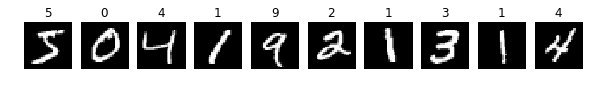

In [36]:
for i in xrange(10):
    plt.subplot(1, 10, i + 1)
    plt.title(str(train_labels[i]))
    plt.imshow(train_images[i].reshape((image_size, image_size)))
    plt.axis('off')

In [130]:
hidden_neurons = 100
minibatch_size = 200
regularization_factor = 0.1
learning_rate = 1e-5

# 3 relu layers, 1 output softmax layer
W1 = np.random.uniform(high = 0.1, size = (features_size, hidden_neurons))
b1 = np.random.uniform(high = 0.1, size = (hidden_neurons,))
W2 = np.random.uniform(high = 0.1, size = (hidden_neurons, hidden_neurons))
b2 = np.random.uniform(high = 0.1, size = (hidden_neurons,))
W3 = np.random.uniform(high = 0.1, size = (hidden_neurons, hidden_neurons))
b3 = np.random.uniform(high = 0.1, size = (hidden_neurons,))
W4 = np.random.uniform(high = 0.1, size = (hidden_neurons, classes_count))
b4 = np.random.uniform(high = 0.1, size = (classes_count,))

for epoch in range(1000):
    choice = np.random.choice(train_images.shape[0], minibatch_size)
    X = train_images[choice]
    y = train_labels[choice]
    
    # forward pass
    H1 = np.maximum(np.dot(X, W1) + b1, 0)
    H2 = np.maximum(np.dot(H1, W2) + b2, 0)
    H3 = np.maximum(np.dot(H2, W3) + b3, 0)
    H4 = np.dot(H3, W4) + b4

    scores = H4 - np.max(H4, axis = 1, keepdims = True)
    probs = np.exp(scores)
    probs /= np.sum(probs, axis = 1, keepdims = True)
    labels = np.argmax(probs, axis = 1)

    accuracy = np.mean(labels == y)    

    loss = np.sum(-np.log(probs[range(minibatch_size), y])) / minibatch_size
    loss += 0.5 * regularization_factor * (np.sum(W1 * W1) + np.sum(b1 * b1))
    loss += 0.5 * regularization_factor * (np.sum(W2 * W2) + np.sum(b2 * b2))
    loss += 0.5 * regularization_factor * (np.sum(W3 * W3) + np.sum(b3 * b3))
    loss += 0.5 * regularization_factor * (np.sum(W4 * W4) + np.sum(b4 * b4))

    if epoch % 100 == 0: print 'epoch %d: accuracy = %f, loss = %f' % (epoch, accuracy, loss)
            
    # backprop
    dscores = np.array(probs)
    dscores[range(minibatch_size), y] -= 1
    dscores /= minibatch_size
    
    dW4 = np.dot(H3.T, dscores)
    db4 = np.sum(dscores, axis = 0, keepdims = True)
    dW4 += regularization_factor * W4
    db4 += regularization_factor * b4
   
    W4 += - learning_rate * dW4
    b4 += - learning_rate * b4


epoch 0: accuracy = 0.135000, loss = 76.515578
epoch 100: accuracy = 0.095000, loss = 19.129421
epoch 200: accuracy = 0.115000, loss = 19.300669
epoch 300: accuracy = 0.080000, loss = 19.356283
epoch 400: accuracy = 0.120000, loss = 19.635340
epoch 500: accuracy = 0.095000, loss = 18.988358
epoch 600: accuracy = 0.155000, loss = 19.269745
epoch 700: accuracy = 0.105000, loss = 19.098026
epoch 800: accuracy = 0.120000, loss = 19.068452
epoch 900: accuracy = 0.125000, loss = 18.950673
